In [280]:
import pandas as pd

In [281]:
import numpy as np

In [282]:
df = pd.read_csv('dataset/titanic.csv')

In [283]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
896,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
898,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
899,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [284]:
import seaborn as sns

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

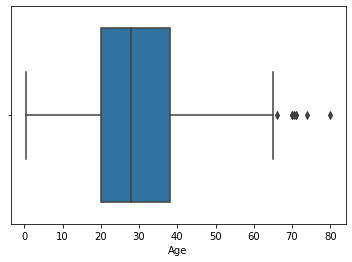

In [285]:
sns.boxplot(df['Age'])

In [286]:
df['Age'].skew()

0.41042037284237765

In [287]:
Q1 = df['Age'].quantile(0.25)

In [288]:
Q1

20.0

In [289]:
Q3 = df['Age'].quantile(0.75)

In [290]:
Q3

38.0

In [291]:
iqr = Q3-Q1
iqr

18.0

In [292]:
ul = Q3+1.5*iqr

In [293]:
ul

65.0

In [294]:
ll = Q1-1.5*iqr

In [295]:
ll

-7.0

In [296]:
df[(df['Age']<-7)|(df['Age']>65)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,34,0.0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
106,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
126,117,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
503,494,0.0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
640,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
682,673,0.0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
755,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
861,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [297]:
df[(df['Age']>-7)&(df['Age']<65)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
895,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
896,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
899,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [298]:
df["Age"] = np.where(df['Age']<ll,
        ll,
        np.where(df['Age']>ul,
                ul,
                df['Age']))

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

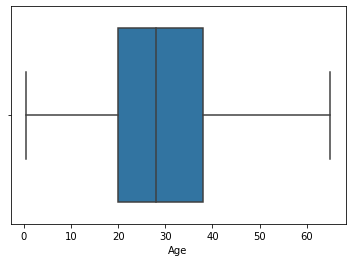

In [299]:
sns.boxplot(df['Age'])

In [300]:
df["Fare"].skew()

4.331947310823125

In [301]:
Q1 = df["Fare"].quantile(0.25)

In [302]:
Q1

7.9031

In [303]:
df1 = pd.read_csv('dataset/employees.csv')
df1

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [304]:
df1.fillna(method = 'bfill',inplace = True)

In [305]:
df1.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [306]:
df1.drop(columns = ['First Name'],inplace = True)
df1

,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Male,3/31/1996,6:53 AM,61933,4.170,True,Finance
2,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...
995,Male,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

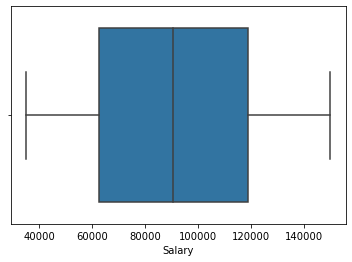

In [307]:
sns.boxplot(df1["Salary"])

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus %'>

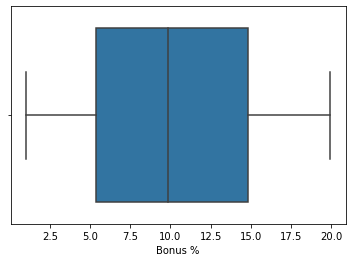

In [308]:
sns.boxplot(df1["Bonus %"])

In [309]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [310]:
tr = ColumnTransformer(transformers = [
    ('a1',OneHotEncoder(drop = "first",sparse = False),['Gender','Senior Management','Team','Last Login Time','Start Date'])
],remainder = 'passthrough')

In [311]:
tr

ColumnTransformer(remainder='passthrough',
                  transformers=[('a1',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender', 'Senior Management', 'Team',
                                  'Last Login Time', 'Start Date'])])

In [312]:
a = tr.fit_transform(df1)

In [313]:
a

array([[1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.73080e+04, 6.94500e+00],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.19330e+04, 4.17000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.30590e+05, 1.18580e+01],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.69140e+04, 1.42100e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.05000e+04, 1.19850e+01],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.29949e+05, 1.01690e+01]])

In [314]:
df2 = pd.read_csv('dataset/CreditCard_DV.csv')
df2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816
...,...,...,...,...,...,...,...,...,...,...,...
95,719712633,Existing Customer,64,M,1,Graduate,Less than $40K,1709.0,895,814.0,1673
96,772629333,Existing Customer,45,M,3,Graduate,$40K - $60K,3454.0,1200,2254.0,1313
97,720336708,Existing Customer,53,M,3,Doctorate,$40K - $60K,3789.0,1706,2083.0,1609
98,802013583,Existing Customer,56,M,3,College,$120K +,9689.0,2250,7439.0,1158


In [315]:
df2.drop(columns = ['Attrition_Flag'],inplace = True)
df2

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816
...,...,...,...,...,...,...,...,...,...,...
95,719712633,64,M,1,Graduate,Less than $40K,1709.0,895,814.0,1673
96,772629333,45,M,3,Graduate,$40K - $60K,3454.0,1200,2254.0,1313
97,720336708,53,M,3,Doctorate,$40K - $60K,3789.0,1706,2083.0,1609
98,802013583,56,M,3,College,$120K +,9689.0,2250,7439.0,1158


C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Limit'>

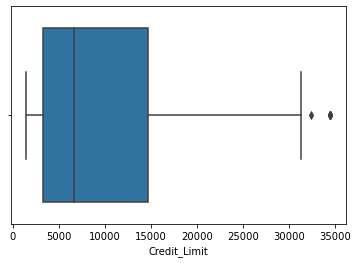

In [316]:
sns.boxplot(df2["Credit_Limit"])

In [317]:
df2["Credit_Limit"].skew()

1.243634183264906

In [318]:
Q1 = df2["Credit_Limit"].quantile(0.25)
Q1

3309.25

In [319]:
Q3 = df2["Credit_Limit"].quantile(0.75)
Q3

14746.5

In [320]:
iqr = Q3-Q1

In [321]:
iqr

11437.25

In [322]:
ll = Q1-1.5*iqr

In [323]:
ll

-13846.625

In [324]:
ul = Q3+1.5*iqr

In [325]:
ul

31902.375

In [326]:
df2["Credit_Limit"] = np.where(df2["Credit_Limit"]<ll,
                              ll,
                              np.where(df2["Credit_Limit"]>ul,
                                      ul,
                                      df2["Credit_Limit"]))

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Limit'>

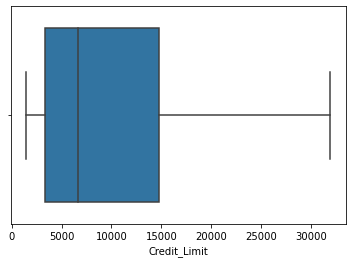

In [327]:
sns.boxplot(df2["Credit_Limit"])

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Revolving_Bal'>

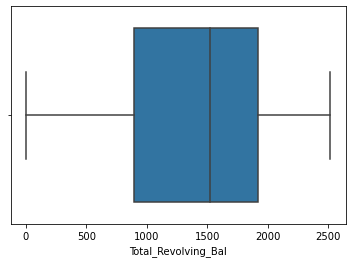

In [328]:
sns.boxplot(df2["Total_Revolving_Bal"])

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Purchase'>

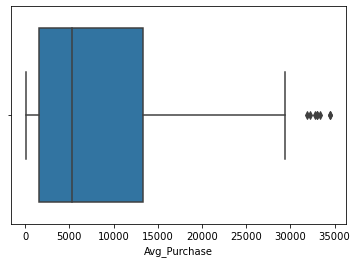

In [329]:
sns.boxplot(df2["Avg_Purchase"])

In [330]:
df2["Avg_Purchase"].skew()

1.2355862582556214

In [331]:
Q1 = df2["Avg_Purchase"].quantile(0.25)

In [332]:
Q1

1546.825

In [333]:
Q3 = df2["Avg_Purchase"].quantile(0.75)

In [334]:
Q3

13337.25

In [335]:
iqr = Q3-Q1

In [336]:
iqr

11790.425

In [337]:
ll = Q1-1.5*iqr

In [338]:
ll

-16138.812499999996

In [339]:
ul = Q3+1.5*iqr

In [340]:
ul

31022.887499999997

In [341]:
df2["Avg_Purchase"] = np.where(df2["Avg_Purchase"]<ll,
                              ll,
                              np.where(df2["Avg_Purchase"]>ul,
                                      ul,
                                      df2["Avg_Purchase"]))

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Purchase'>

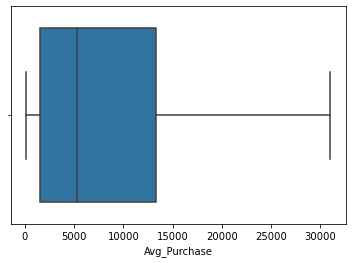

In [342]:
sns.boxplot(df2["Avg_Purchase"])

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Trans_Amt'>

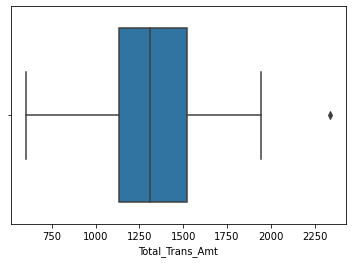

In [343]:
sns.boxplot(df2["Total_Trans_Amt"])


In [344]:
df2["Total_Trans_Amt"].skew()

0.1339279879698809

In [345]:
Q1 = df2["Total_Trans_Amt"].quantile(0.25)
Q1

1130.5

In [346]:
Q3 = df2["Total_Trans_Amt"].quantile(0.75)
Q3

1519.75

In [347]:
iqr = Q3-Q1

In [348]:
iqr

389.25

In [349]:
ll = Q1-1.5*iqr
ll

546.625

In [350]:
ul = Q3+1.5*iqr
ul

2103.625

In [351]:
df2["Total_Trans_Amt"] = np.where(df2["Total_Trans_Amt"]<ll,
                                 ll,
                                 np.where(df2["Total_Trans_Amt"]>ul,
                                         ul,
                                         df2["Total_Trans_Amt"]))

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Trans_Amt'>

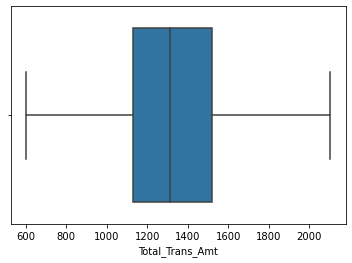

In [352]:
sns.boxplot(df2["Total_Trans_Amt"])



In [353]:
df2

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144.0
1,818770008,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291.0
2,713982108,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887.0
3,769911858,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171.0
4,709106358,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816.0
...,...,...,...,...,...,...,...,...,...,...
95,719712633,64,M,1,Graduate,Less than $40K,1709.0,895,814.0,1673.0
96,772629333,45,M,3,Graduate,$40K - $60K,3454.0,1200,2254.0,1313.0
97,720336708,53,M,3,Doctorate,$40K - $60K,3789.0,1706,2083.0,1609.0
98,802013583,56,M,3,College,$120K +,9689.0,2250,7439.0,1158.0


In [370]:
df2['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [354]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [371]:
tr = ColumnTransformer(transformers = [
    ('t1',OneHotEncoder(),['Gender','Income_Category']),
    ('t2',OrdinalEncoder(categories = [['Doctorate','Post-Graduate','Graduate','College','High School','Uneducated','Unknown']]),['Education_Level'])
],remainder = "passthrough")

In [372]:
tr

ColumnTransformer(remainder='passthrough',
                  transformers=[('t1', OneHotEncoder(),
                                 ['Gender', 'Income_Category']),
                                ('t2',
                                 OrdinalEncoder(categories=[['Doctorate',
                                                             'Post-Graduate',
                                                             'Graduate',
                                                             'College',
                                                             'High School',
                                                             'Uneducated',
                                                             'Unknown']]),
                                 ['Education_Level'])])

In [373]:
tr.fit_transform(df2)

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.7700e+02, 1.1914e+04,
        1.1440e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 8.6400e+02, 7.3920e+03,
        1.2910e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.4180e+03,
        1.8870e+03],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.7060e+03, 2.0830e+03,
        1.6090e+03],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.2500e+03, 7.4390e+03,
        1.1580e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.6280e+03, 3.8210e+03,
        8.3600e+02]])

In [374]:
import pandas as pd

In [375]:
import numpy as np

In [376]:
df = pd.read_csv('dataset/titanic.csv')

In [377]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
896,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
898,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
899,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [378]:
df.duplicated().sum()

10

In [379]:
df.loc[df.duplicated(),:].shape

(10, 12)

In [380]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
896,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
898,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
899,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [381]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
5,3,NaN,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,NaN,NaN,S
6,4,NaN,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
896,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
898,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
899,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [382]:
df.append(pd.DataFrame([[22,1,2,"Beesley, Mr. Lawrence",'male',34,0,0,248698,13,'D56','S'
]],columns = df.columns))

C:\Users\CS-L2-PC08\AppData\Local\Temp\ipykernel_10968\2942403814.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(pd.DataFrame([[22,1,2,"Beesley, Mr. Lawrence",'male',34,0,0,248698,13,'D56','S'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
898,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
899,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
900,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [383]:
df.isnull().sum()

PassengerId      0
Survived         4
Pclass           0
Name             0
Sex              0
Age            178
SibSp            0
Parch            0
Ticket           0
Fare             3
Cabin          690
Embarked         2
dtype: int64

In [384]:
df.fillna(method = "bfill",inplace = True)

In [385]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
3,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
4,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
896,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
898,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,C148,S
899,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [386]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [387]:
df.dropna(inplace = True)

In [388]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
3,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
4,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
895,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,B42,Q
896,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
897,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
898,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,C148,S


In [389]:
import seaborn as sns

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

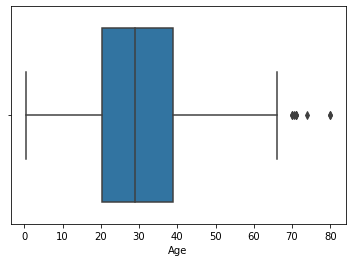

In [390]:
sns.boxplot(df['Age'])

In [391]:
df['Age'].skew()

0.35892281248605906

In [392]:
Q1 = df['Age'].quantile(0.25)
Q1

20.375

In [393]:
Q3 = df['Age'].quantile(0.75)
Q3

39.0

In [394]:
iqr = Q3-Q1

In [395]:
iqr

18.625

In [396]:
ll = Q1-1.5*iqr
ll

-7.5625

In [397]:
ul = Q3+1.5*iqr
ul

66.9375

In [398]:
df['Age'] = np.where(df['Age']<ll,
                    ll,
                    np.where(df['Age']>ul,
                            ul,
                            df['Age']))

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

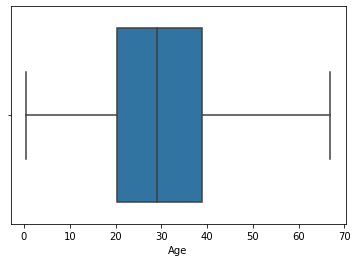

In [399]:
sns.boxplot(df['Age'])

In [401]:
df2 = pd.read_csv('dataset/mtcars.csv')

In [402]:
df2.duplicated().sum()

0

In [403]:
df2

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

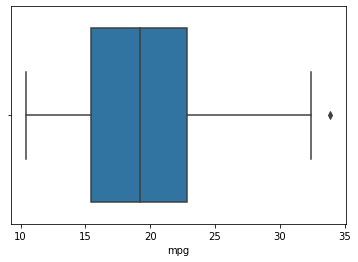

In [407]:
sns.boxplot(df2['mpg'])

In [404]:
df2.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [410]:
from sklearn.compose import ColumnTransformer

In [411]:
from sklearn.preprocessing import OneHotEncoder

In [412]:
tr = ColumnTransformer(transformers = [
    ('a1',OneHotEncoder(),['mpg'])
],remainder = 'passthrough')

In [413]:
tr.fit_transform(df2)

array([[0.0, 0.0, 0.0, ..., 1, 4, 4],
       [0.0, 0.0, 0.0, ..., 1, 4, 4],
       [0.0, 0.0, 0.0, ..., 1, 4, 1],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 5, 6],
       [0.0, 0.0, 0.0, ..., 1, 5, 8],
       [0.0, 0.0, 0.0, ..., 1, 4, 2]], dtype=object)